In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### Combine Datasets

In [5]:
dfsmallRNA = pd.read_csv("../Datasets/Dataset02/data2.csv", index_col=0)
dftotalRNA = pd.read_csv("../Datasets/Dataset03/data2.csv", index_col=0)

y = dfsmallRNA['Diagnosis']
dfsmallRNA = dfsmallRNA.drop('Diagnosis', axis=1)
dftotalRNA = dftotalRNA.drop('Diagnosis', axis=1)

combined_df = pd.concat([dfsmallRNA, dftotalRNA, y], axis=1)
combined_df.to_csv("../Datasets/Dataset04/data2.csv")
combined_df

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,Diagnosis
0,0.040816,0.097864,0.664833,0.113356,0.685477,0.123047,0.693980,0.320224,0.807927,0.375000,...,0.0,0.133333,0.0,0.0,0.50,0.305556,0.0,0.285714,0.0,0.0
1,0.000000,0.137004,0.335195,0.127837,0.355096,0.054688,0.333792,0.055878,0.449068,0.361020,...,0.0,0.066667,0.0,0.0,0.50,0.194444,0.0,0.571429,0.0,0.0
2,0.000000,0.188432,0.000000,0.066566,0.000000,0.000000,0.000000,0.131098,0.059097,0.215461,...,0.0,0.133333,0.0,0.0,0.25,0.000000,0.0,0.142857,0.0,0.0
3,0.142857,0.494601,0.382655,0.433542,0.339655,0.245117,0.229798,0.687943,0.472455,0.560855,...,0.0,0.266667,0.0,0.0,0.25,0.333333,0.0,0.285714,0.0,0.0
4,0.081633,0.345897,0.185677,0.338448,0.173861,0.289062,0.120455,0.440146,0.181928,0.273026,...,0.0,0.000000,0.0,0.0,0.25,0.694444,0.0,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.102041,0.082687,0.874146,0.049708,0.607825,0.150391,0.710508,0.236407,0.544049,0.188043,...,0.0,0.333333,0.0,0.0,0.00,0.777778,0.0,0.000000,0.0,1.0
75,0.183673,0.386900,0.220304,0.277610,0.197624,0.201172,0.165458,0.290995,0.098610,0.123898,...,0.0,0.533333,0.0,0.0,0.50,0.805556,0.0,0.428571,0.0,1.0
76,0.000000,0.000000,0.539058,0.010374,0.805786,0.082031,1.000000,0.475392,0.253626,0.000000,...,0.0,0.400000,0.0,0.0,0.25,0.500000,0.0,0.428571,0.0,1.0
77,0.081633,0.260740,0.719281,0.246920,0.397459,0.197266,0.343082,0.519235,0.212309,0.239309,...,0.0,0.200000,0.0,0.0,0.00,0.333333,0.0,0.000000,0.0,1.0


In [4]:
combined_df.describe()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,Diagnosis
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.198398,0.366577,0.422477,0.314956,0.353642,0.264735,0.322886,0.389703,0.326455,0.317705,...,0.012658,0.235443,0.025316,0.0,0.268987,0.413502,0.025316,0.253165,0.018987,0.493671
std,0.158753,0.228336,0.198630,0.205673,0.193617,0.183711,0.212537,0.217028,0.204572,0.165212,...,0.112509,0.198236,0.158088,0.0,0.270837,0.206915,0.136314,0.232103,0.125142,0.503155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091837,0.172471,0.276115,0.126864,0.216941,0.137207,0.183476,0.252955,0.184759,0.214638,...,0.000000,0.133333,0.000000,0.0,0.000000,0.291667,0.000000,0.142857,0.000000,0.000000
50%,0.163265,0.345897,0.407015,0.306894,0.312080,0.220703,0.258713,0.387277,0.281955,0.305921,...,0.000000,0.200000,0.000000,0.0,0.250000,0.361111,0.000000,0.142857,0.000000,0.000000
75%,0.275510,0.519998,0.549201,0.432137,0.435923,0.371094,0.396646,0.523963,0.433982,0.374449,...,0.000000,0.333333,0.000000,0.0,0.500000,0.513889,0.000000,0.428571,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

### Select best Feature Selection Algorithm

In [6]:
df = pd.read_csv("../Datasets/Dataset04/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

result_df = pd.DataFrame(
    columns=['Feature Selection Algorithm', 'Feature Count', 'Cross Validation Score'])

feature_counts = [25,50,100,150,200]

feature_selection_algorithms = [
    ('Information Gain (Mutual info)', mutual_info_classif),
    ('Correlation Coefficient', f_classif),
    ('Chi-Square', chi2),
    ('Feature Importance', RandomForestClassifier().fit(
        X, y).feature_importances_)
]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for algo_name, algo_func in feature_selection_algorithms:
    for count in feature_counts:
        if algo_name == 'Feature Importance':
            selected_features = X.columns[algo_func.argsort(
            )[-count:][::-1]]
        else:
            selected_features = X.columns[algo_func(
                X, y)[0].argsort()[-count:][::-1]]

        clf = GaussianNB()
        cv_scores = cross_val_score(
            clf, X[selected_features], y, cv=cv)

        result_df = pd.concat([result_df, pd.DataFrame({
            'Feature Selection Algorithm': [algo_name],
            'Feature Count': [count],
            'Cross Validation Score': [f'{cv_scores.mean():.2f}+/-{cv_scores.std():.2f}']
        })], ignore_index=True)

print(result_df)

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   38    44    53 ... 60614 60617 60621] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACE

       Feature Selection Algorithm Feature Count Cross Validation Score
0   Information Gain (Mutual info)            25            0.40+/-0.22
1   Information Gain (Mutual info)            50            0.40+/-0.22
2   Information Gain (Mutual info)           100            0.40+/-0.22
3   Information Gain (Mutual info)           150            0.40+/-0.22
4   Information Gain (Mutual info)           200            0.40+/-0.22
5          Correlation Coefficient            25            0.51+/-0.14
6          Correlation Coefficient            50            0.51+/-0.14
7          Correlation Coefficient           100            0.51+/-0.14
8          Correlation Coefficient           150            0.51+/-0.14
9          Correlation Coefficient           200            0.51+/-0.14
10                      Chi-Square            25            0.51+/-0.14
11                      Chi-Square            50            0.51+/-0.14
12                      Chi-Square           100            0.51

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naiv

### Check Feature Importance

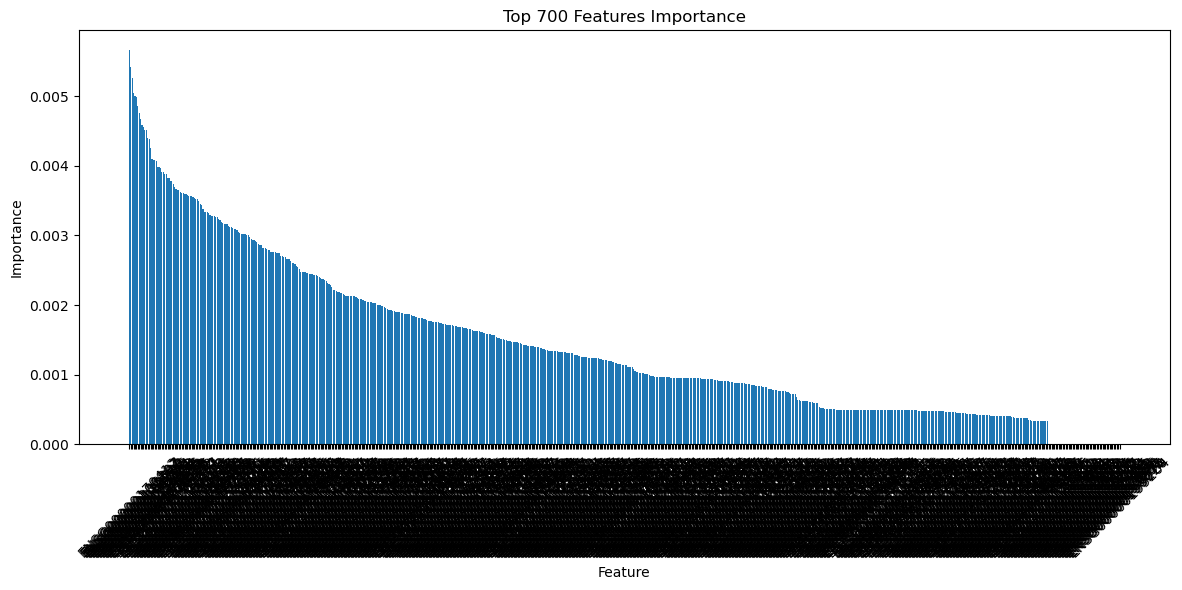

Last important feature:  649


In [7]:
df = pd.read_csv("../Datasets/Dataset04/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

feature_names = X.columns

k_values = [700] 

selected_features_dict = {}

for k in k_values:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    selected_features = np.array(feature_names)[
        np.argsort(feature_importances)[::-1][:k]]

    selected_features_dict[k] = selected_features

    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(k), feature_importances[sorted_idx][:k], align="center")
    plt.xticks(range(k), np.array(feature_names)[sorted_idx][:k], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    zero_importance_index = np.where(feature_importances == 0)[0]
    print("Last important feature: ", len(
        X.columns)-len(zero_importance_index))

### Feature Selection

In [8]:
df = pd.read_csv("../Datasets/Dataset04/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

feature_counts = range(1,81)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

feature_importances = clf.feature_importances_

selected_features = X.columns[np.argsort(feature_importances)[::-1]]

datasets = {}
for count in feature_counts:
    datasets[count] = X[selected_features[:count]].copy()
    datasets[count]['Diagnosis'] = y

for count, dataset in datasets.items():
    dataset.to_csv(
        f'../Datasets/Dataset04/Feature_Select/dataset_{count}.csv', index=True)

## Model Building

### Check CV Score for Different Models

In [3]:
feature_counts = list(range(1, 81))

models = {
    "SVM(linear)": SVC(kernel='linear'),
    "SVM(poly)": SVC(kernel='poly'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "ANN": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

results = pd.DataFrame(
    columns=["Model Name", "Feature Count", "CV Score (Mean +/- Std)"])

for count in feature_counts:
    file_path = f"../Datasets/Dataset04/Feature_Select/dataset_{count}.csv"
    df = pd.read_csv(file_path, index_col=0)

    X = df.drop('Diagnosis', axis=1)
    y = df['Diagnosis']

    for model_name, model in models.items():
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        result = f"{mean_score:.4f} +/- {std_score:.4f}"
        results = results.append({"Model Name": model_name, "Feature Count": count,
                                 "CV Score (Mean +/- Std)": result}, ignore_index=True)

results.sort_values(by=["CV Score (Mean +/- Std)"], ascending=False, inplace=True)
results.to_csv("../Datasets/Dataset04/Feature_Select/results.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14936\3000992169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_14936\3000992169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_14936\3000992169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_14936\3000992169.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [38]:
df = pd.read_csv("../Datasets/Dataset04/Feature_Select/results.csv")
df.head(10)

,Model Name,Feature Count,CV Score (Mean +/- Std)
0,Naive Bayes,14,0.9625 +/- 0.0500
1,Naive Bayes,15,0.9625 +/- 0.0306
2,Naive Bayes,16,0.9625 +/- 0.0306
3,Random Forest,43,0.9500 +/- 0.0250
4,ANN,78,0.9375 +/- 0.0559
5,ANN,52,0.9375 +/- 0.0395
6,SVM(poly),20,0.9375 +/- 0.0395
7,ANN,64,0.9375 +/- 0.0395
8,ANN,61,0.9375 +/- 0.0395
9,ANN,55,0.9375 +/- 0.0395
